# Random walk in 2D space based on agent angle orientation
Import dependencies:

In [1]:
import random
import matplotlib.pyplot as plt

Import `randomWalk_v01` module:

In [2]:
import randomWalk_v01 as rw_01

Set the parameter values for our simulations:

In [3]:
### parameters
#### global
seed = 123
numberOfRuns = 3
movements = 20
worldDimensions = {"x":(-50,50), "y":(-50,50)}

#### initial conditions
initPositionX = 0.0
initPositionY = 0.0
initDirection = 0.0

#### movement parameters
angleLeftMax = 30.0
angleRightMax = 30.0
moveDistanceMin = 1.0
moveDistanceMax = 3.0

Initialise lists that will hold the coordinates of our simulation runs:

In [4]:
### position series holders (multiple runs)
x = []
y = []
for i in range(0,numberOfRuns):
    x.append([initPositionX])
    y.append([initPositionY])
print("x = " + str(x))
print("y = " + str(y))

x = [[0.0], [0.0], [0.0]]
y = [[0.0], [0.0], [0.0]]


Initialise random number generator using chosen seed:

In [5]:
### set random seed
random.seed = seed

Initialise a single instance of `Walker` which will perform the random walk sequentially in each run:

In [6]:
### initialise walker agent
randomWalker = rw_01.Walker(initPositionX, initPositionY, initDirection)
randomWalker

For `numberOfRuns` times, instruct the `Walker` to perform a random walk (`.MoveRandom()`) starting at the initial position and according to the movement parameters:

In [7]:
### move walker 'movements' times
for i in range(0,numberOfRuns):
    ### move walker
    for j in range(0,movements):
        randomWalker.MoveRandom(angleLeftMax, angleRightMax, 
                                moveDistanceMin, moveDistanceMax, 
                                worldDimensions)
        x[i].append(randomWalker.positionX)
        y[i].append(randomWalker.positionY)
    ### reset walker
    randomWalker.positionX = initPositionX
    randomWalker.positionY = initPositionY
    randomWalker.direction = initDirection

This can be also done using a different `Walker` for each trajectory and moving them step-by-step (uncomment code to run this alternative):

In [8]:
### position series holders (multiple runs)
#x = []
#y = []
#for i in range(0,numberOfRuns):
#    x.append([initPositionX])
#    y.append([initPositionY])
### initialise walkers
#randomWalkers = []
#for i in range(0,numberOfRuns):
#    randomWalkers.append(rw_01.Walker(initPositionX, initPositionY, initDirection))
### move walkers
#for j in range(0,movements):
#    walkerScheduler = random.sample(list(range(numberOfRuns)), numberOfRuns)
#    for walkerIndex in walkerScheduler:
#        randomWalkers[walkerIndex].MoveRandom(angleLeftMax, angleRightMax, 
#                                              moveDistanceMin, moveDistanceMax, 
#                                              worldDimensions)
#        x[walkerIndex].append(randomWalkers[walkerIndex].positionX)
#        y[walkerIndex].append(randomWalkers[walkerIndex].positionY)

Inspect the initial four steps in x of the First trajectory:

In [9]:
print("x[0][0:5] = " + str(x[0][0:5]))

x[0][0:5] = [0.0, 1.4012189510007884, 1.1734564620782892, 2.6538566192901083, 0.8932362127630085]


Plot each trajectory differentiating them by color and labeling the index of each step: 

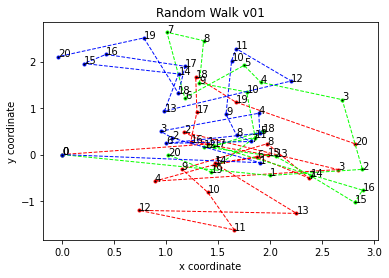

In [10]:
colors = plt.get_cmap('hsv', 512)

### plotting the trajectories for each run  
for i in range(0,numberOfRuns):
    # plot points
    plt.plot(x[i], y[i], 
             color = colors(i/numberOfRuns), 
             linestyle = 'dashed', 
             linewidth = 1, 
             marker = 'o', 
             markerfacecolor = 'black', 
             markersize = 3)
    for j in range(0,len(x[i])):
        plt.annotate(str(j), (x[i][j], y[i][j]))

### naming the x axis 
plt.xlabel('x coordinate') 
### naming the y axis 
plt.ylabel('y coordinate') 
  
### giving a title to my graph 
plt.title('Random Walk v01') 
  
### function to show the plot 
plt.show() 

## Built-in tests
Test if positions is outside the world coordinates (`IsOutsideWorld()`):

In [11]:
### initial position?
rw_01.Walker.Test_IsOutsideWorld(initPositionX, initPositionY, worldDimensions)

"IsOutsideWorld(x = 0.0, y = 0.0, worldDimensions = {'x': (-50, 50), 'y': (-50, 50)}) -> False"

In [12]:
### position with x lower than world minimum?
rw_01.Walker.Test_IsOutsideWorld(worldDimensions["x"][0] - 1, initPositionY, worldDimensions)

"IsOutsideWorld(x = -51, y = 0.0, worldDimensions = {'x': (-50, 50), 'y': (-50, 50)}) -> True"

Test if `GetRandomRotation()` is within the range set by parameters:

In [13]:
### test GetRandomRotation
print(rw_01.Walker.Test_GetRandomRotation(initDirection, angleLeftMax=angleLeftMax, angleRightMax=angleRightMax))
print(rw_01.Walker.Test_GetRandomRotation(initDirection, angleLeftMax=angleLeftMax, angleRightMax=angleRightMax))
print(rw_01.Walker.Test_GetRandomRotation(initDirection, angleLeftMax=angleLeftMax, angleRightMax=angleRightMax))

GetRandomRotation(currentDirection = 0.0, angleLeftMax = 30.0, angleRightMax = 30.0) -> newDirection = 346.45584024595826 | pass test = True
GetRandomRotation(currentDirection = 0.0, angleLeftMax = 30.0, angleRightMax = 30.0) -> newDirection = 355.63933350369484 | pass test = True
GetRandomRotation(currentDirection = 0.0, angleLeftMax = 30.0, angleRightMax = 30.0) -> newDirection = 26.120750327784243 | pass test = True


Inspect the output of `MoveRandomFree()`:

In [14]:
# test MoveRandomFree
rw_01.Walker.Test_MoveRandomFree(initPositionX, initPositionY, initDirection, 
                                 angleLeftMax, angleRightMax, moveDistanceMin, moveDistanceMax)

'Walker(x = 0.0, y = 0.0, currentDirection = 0.0) -> MoveRandomFree(angleLeftMax = 30.0, angleRightMax = 30.0, moveDistanceMin = 1.0, moveDistanceMax = 3.0) -> (x,y,newDirection) = (2.493984856709849, -1.3893708597280217, 330.8783131367066)'

In [15]:
# test MoveRandom
rw_01.Walker.Test_MoveRandom(initPositionX, initPositionY, initDirection, 
                             angleLeftMax, angleRightMax, moveDistanceMin, moveDistanceMax,
                             worldDimensions)

"Walker(x = 0.0, y = 0.0, currentDirection = 0.0) -> MoveRandom(angleLeftMax = 30.0, angleRightMax = 30.0, moveDistanceMin = 1.0, moveDistanceMax = 3.0, worldDimensions = {'x': (-50, 50), 'y': (-50, 50)}) returns (x,y,newDirection) = (2.8500146735009344, -0.6679685599635571, 346.8094584477718)"

In [16]:
x[0][1]

1.4012189510007884